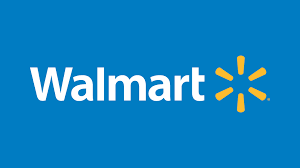

# **1. Importing Python Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import scipy.stats as stats

# **2. Importing the Dataset**

In [3]:
walmart_df = pd.read_csv('walmart_data.csv')

### **2.1 Analyzing first few rows**

In [3]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### **2.2 Finding out Shape and Dimensionality of Dataframe**

In [4]:
walmart_df.shape

(550068, 10)

In [5]:
walmart_df.ndim

2

### **2.3 Extracting Datatype of all columns**

In [6]:
walmart_df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


### **2.4 Extracting Dataset's information**

walmart_df.info()

### **2.5 Checking for Null Values**

In [7]:
walmart_df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


There are 5,50,068 rows in the dataset and as you can see above, there are no null values for any of the columns.

This implies that the process of data collection was carried out with perfection, which is a positive for data analysis and does not require any imputation of data.

### **2.6 Checking for Duplicates**

In [8]:
walmart_df.duplicated().sum()

0

There are no duplicates in this dataset. Therefore, no imputation is required.

### **2.7 Optimising the Dataset by changing Datatype of few columns**

As you can see that the memory being utilised by the dataframe is more than 42.0 MB. Therefore, the next steps will optimise the dataframe, leading to lesser space being utilised.

In [9]:
walmart_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [10]:
old_cols = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

for col in old_cols:
    walmart_df[col] = walmart_df[col].astype('category')

In [11]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


Now we have optimised the memory successfully, reducing the space utilised all the down to 10.3 MB

In [12]:
# Updating Marital Status Column
walmart_df['Marital_Status'] = walmart_df['Marital_Status'].apply(lambda x : 'Married' if x == 1 else 'Unmarried')

### **2.8 Extracting Descriptive Statistics**

#### **2.8.1 For Numerical Columns**

In [13]:
walmart_df.describe().round(2)

,Purchase
count,550068.00
mean,9263.97
std,5023.07
min,12.00
25%,5823.00
50%,8047.00
75%,12054.00
max,23961.00


#### **2.8.2 For Categorical Columns**

In [14]:
walmart_df.describe(include = 'category').round(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Unmarried,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


### **2.9 Sanity Check for all columns**

In [15]:
for cols in walmart_df.columns:
    print(f"Unique values in {cols} column are: {walmart_df[cols].nunique()}")
    print("-" * 85)

Unique values in User_ID column are: 5891
-------------------------------------------------------------------------------------
Unique values in Product_ID column are: 3631
-------------------------------------------------------------------------------------
Unique values in Gender column are: 2
-------------------------------------------------------------------------------------
Unique values in Age column are: 7
-------------------------------------------------------------------------------------
Unique values in Occupation column are: 21
-------------------------------------------------------------------------------------
Unique values in City_Category column are: 3
-------------------------------------------------------------------------------------
Unique values in Stay_In_Current_City_Years column are: 5
-------------------------------------------------------------------------------------
Unique values in Marital_Status column are: 2
----------------------------------------------

# **3. Univariate Analysis**

### **3.1 Numerical Variables**

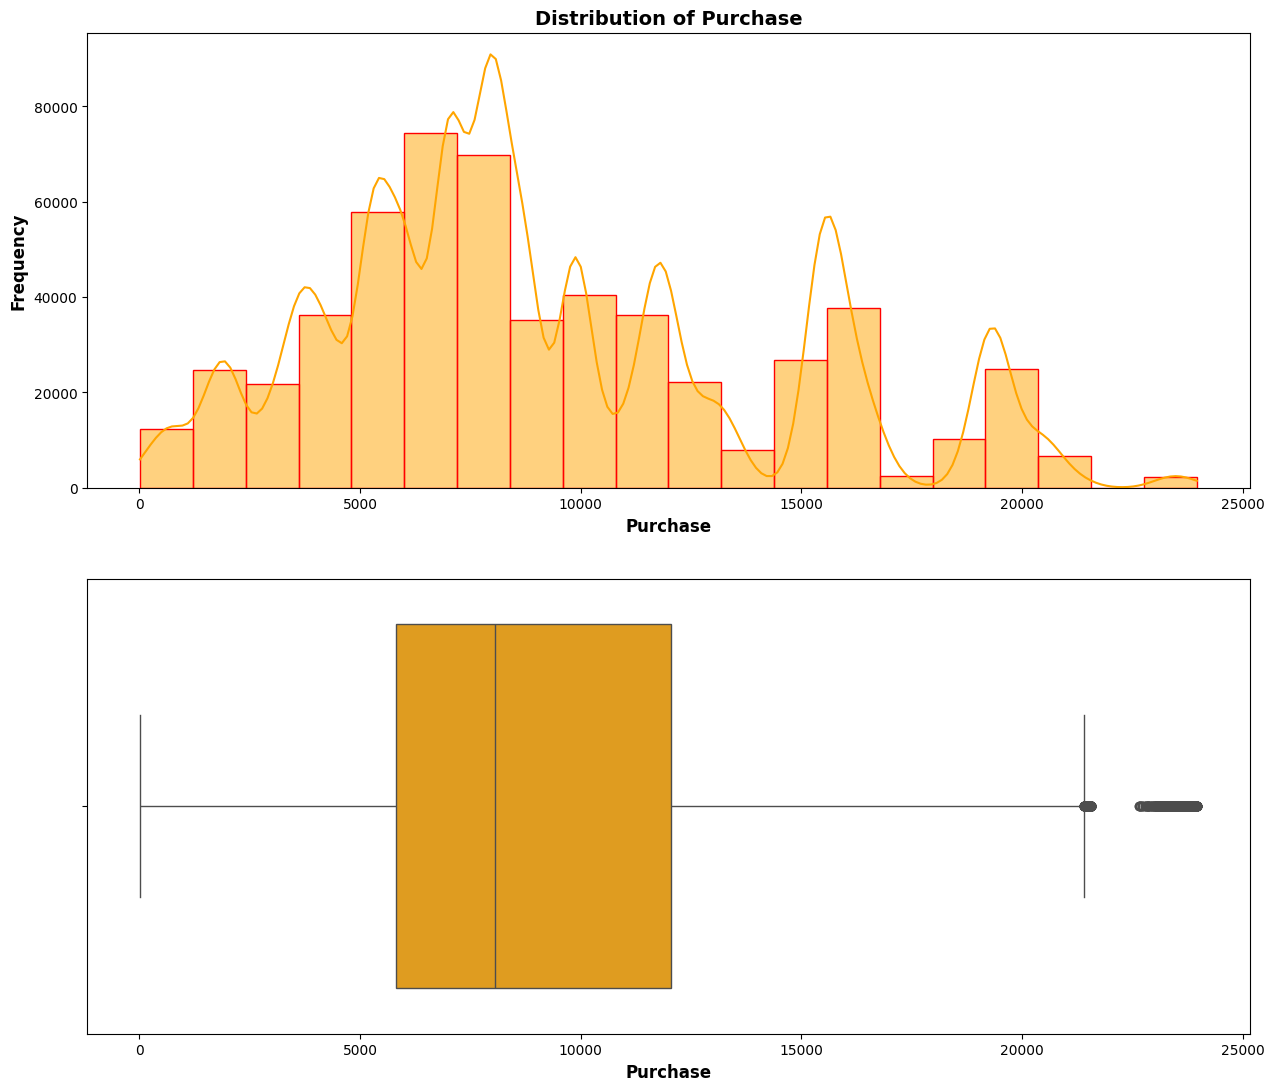

In [16]:
# Distribution of Purchases using Histogram

fig, axes = plt.subplots(2, 1, figsize=(15, 13))

sns.histplot(data=walmart_df, x='Purchase', color='orange', edgecolor='red', kde=True, fill=True, bins=20, ax=axes[0])
axes[0].set_title('Distribution of Purchase', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Frequency', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Purchase', fontweight='bold', fontsize=12)

sns.boxplot(x=walmart_df['Purchase'], color='orange', ax=axes[1])
axes[1].set_xlabel('Purchase', fontweight='bold', fontsize=12)
plt.show()

In [17]:
def outliers(df, col):
    #calculate quartiles and IQR for specific columns
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    #outliers outside upper whisker
    upper_band = Q3 + 1.5*IQR
    lower_band = Q1 - 1.5*IQR
    #outlier in the selected column
    outliers_df = df[(df[col] > upper_band) | (df[col] < lower_band)]

    return outliers_df

In [18]:
print(f"Total number of outliers for 'Purchase' column: {len(outliers(walmart_df, 'Purchase'))}", "\n")
outliers(walmart_df, 'Purchase')

Total number of outliers for 'Purchase' column: 2677 



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,Unmarried,10,23603
375,1000062,P00119342,F,36-45,3,A,1,Unmarried,10,23792
652,1000126,P00087042,M,18-25,9,B,1,Unmarried,10,23233
736,1000139,P00159542,F,26-35,20,C,2,Unmarried,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,Unmarried,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,Unmarried,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,Unmarried,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,Married,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,Married,10,23663


***Insights:***

 There are `2,677` outliers in this dataset which is roughly `0.48%` of this dataset. We will not be handling these outliers or removing these outliers as this information seems important for further analysis of this dataset.


### **3.2 Categorical Variables**

#### **3.2.1 Gender, Marital Status and City Category Distribution**

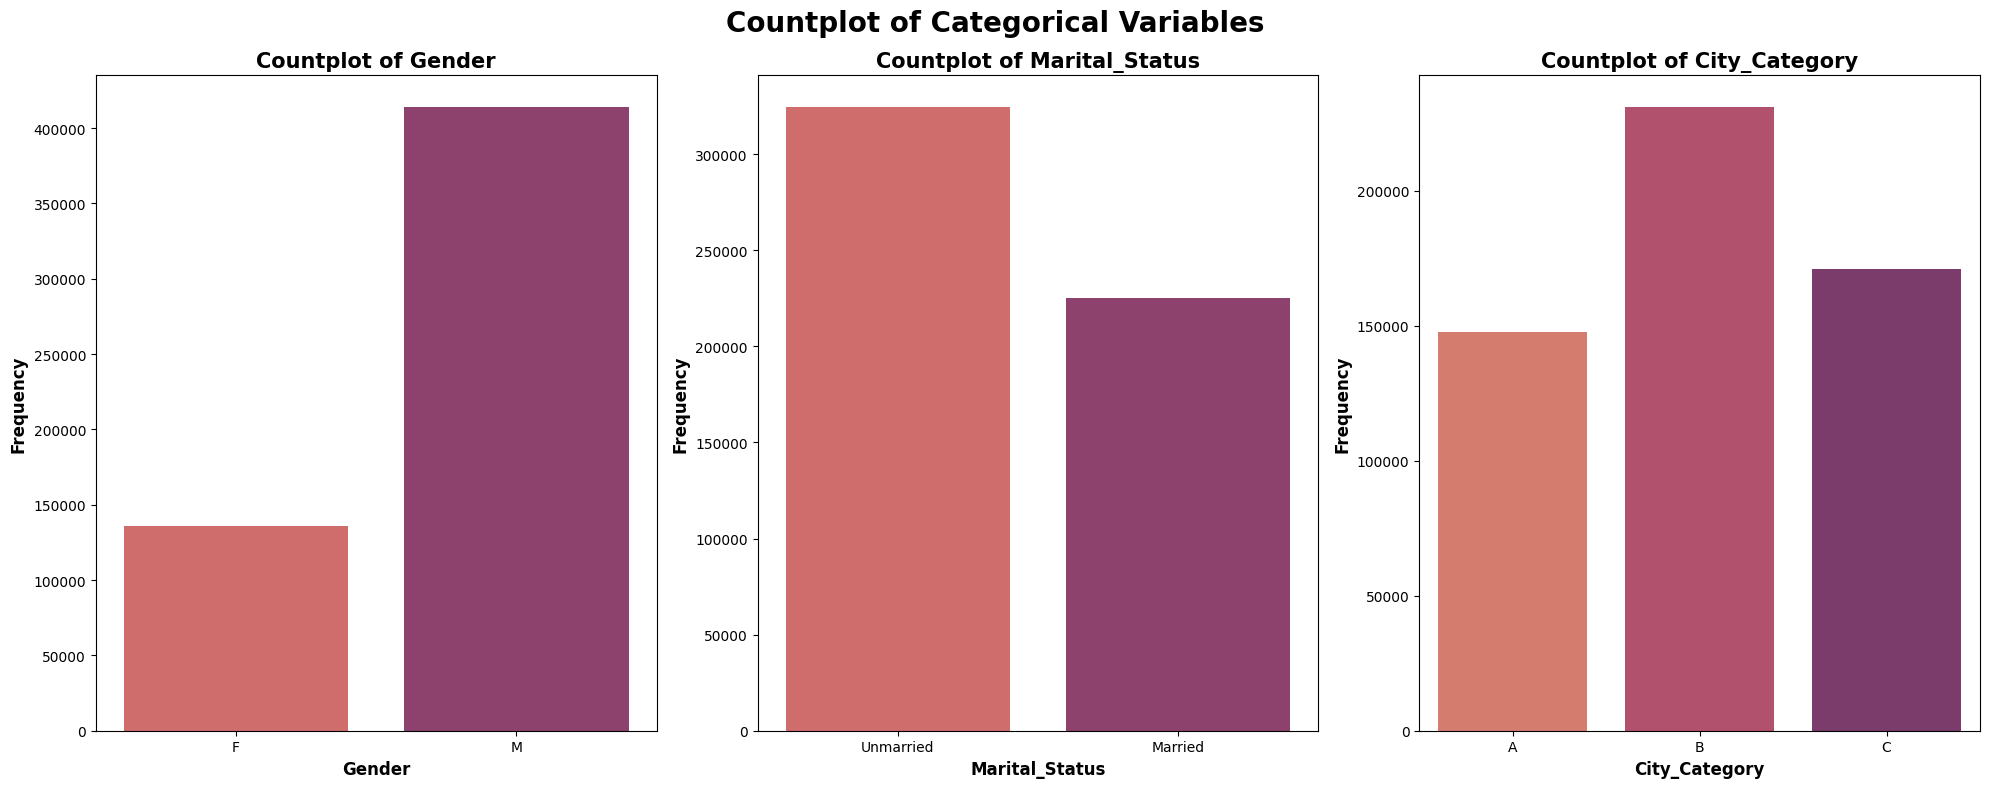

In [19]:
cat_cols = ['Gender', 'Marital_Status', 'City_Category']

fig, axes = plt.subplots(1, 3, figsize = (20, 8))
axes = axes.flatten()

for i, cols in enumerate(cat_cols):
    sns.countplot(data = walmart_df, x = cols, palette = 'flare', ax = axes[i])
    axes[i].set_title(f"Countplot of {cols}", fontweight='bold', fontsize=15)
    axes[i].set_ylabel("Frequency", fontweight='bold', fontsize=12)
    axes[i].set_xlabel(cols, fontweight='bold', fontsize=12)
plt.suptitle('Countplot of Categorical Variables', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

***Insight:***

**1. Gender:** The above chart tells us that there is a huge disparity in the purchasing behaviour of male and female customers during Black Friday.

**2. Marital Status:** As you can see that the unnmaried customers account for higher percentage of transactions, more offers and marketing campaigns should be organized to promote this behaviour.

**3. City Category:** City B accounts for more transactions as compared to any other city. To boost the transactions of other cities, the analytics and marketing team should study the behaviour of customers from city B and develop similar strategies for other cities as well.  


#### **3.2.2 Age Distribution**

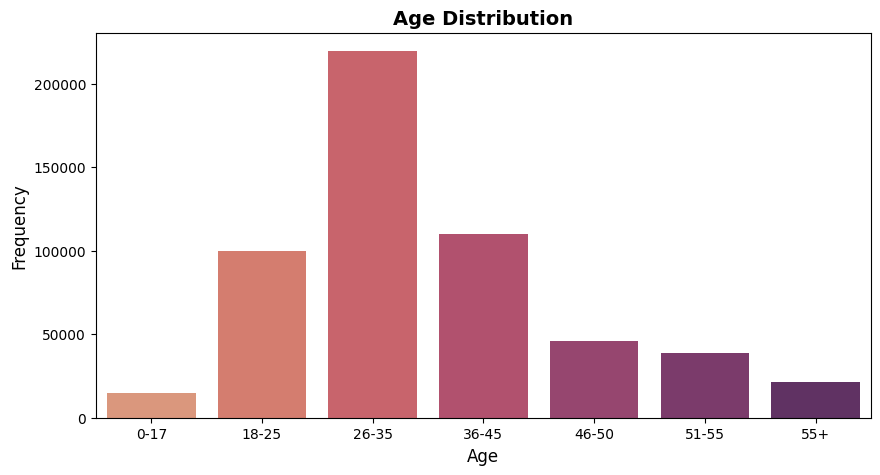

In [20]:
# Creating dataset for Age distribution
walmart_df_age_dist = walmart_df['Age'].value_counts(ascending = False).reset_index()
walmart_df_age_dist.columns = ['Age', 'Count']

# Plotting chart for visualisation
plt.figure(figsize = (10,5))
sns.barplot(data = walmart_df_age_dist, x = 'Age', y = 'Count', palette = 'flare')
plt.title('Age Distribution', fontweight = 'bold', fontsize = 14)
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Age', fontsize = 12)
plt.show()

***Insights:***

- The customers belonging between the age group of `26-35` account for the most transactions made during Black Friday sales.

- Customers belonging to age groups of `18-25` and `36-45` are also very active shoppers during Black Friday sales.

#### **3.2.3 Top 10 Product IDs and Product Categories**

In [21]:
# extracting top 10 Product IDs and Product Categories

top10_products_id = walmart_df['Product_ID'].value_counts(ascending = False).head(10).reset_index()
top10_products_category = walmart_df['Product_Category'].value_counts(ascending = False).head(10).reset_index()

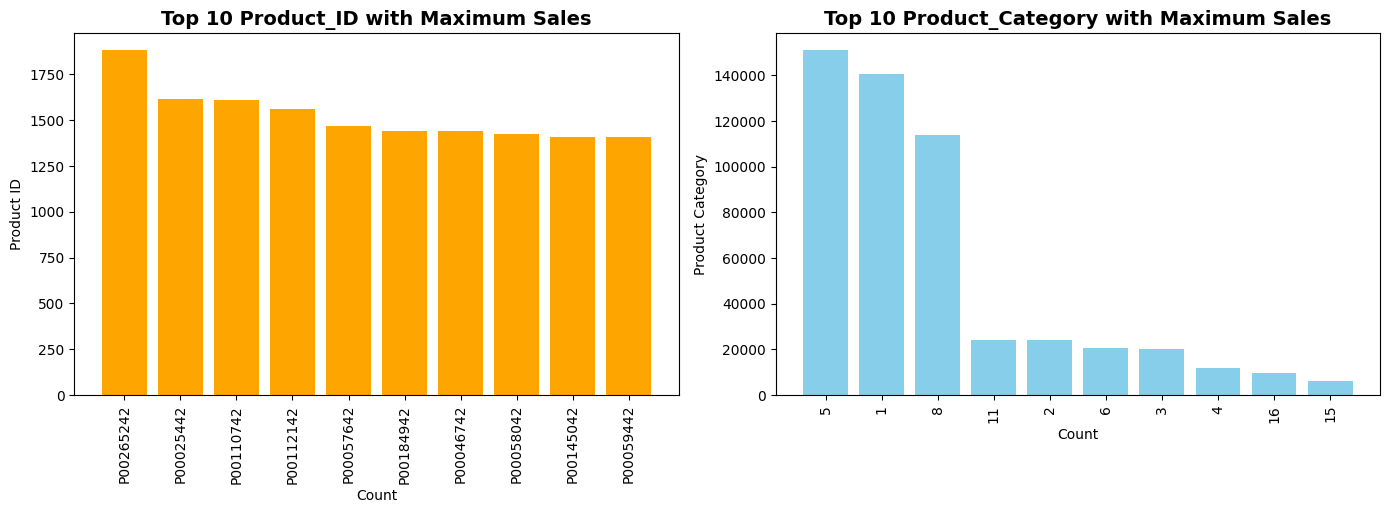

In [22]:
plt.figure(figsize=(14, 9))
plt.subplot(2, 2, 1)
plt.bar(top10_products_id['Product_ID'], top10_products_id['count'], color='Orange')
plt.xlabel("Count")
plt.ylabel("Product ID")
plt.title("Top 10 Product_ID with Maximum Sales", fontweight = 'bold', fontsize = 14)
plt.xticks(rotation=90)

plt.subplot(2 ,2, 2)
plt.bar(top10_products_category['Product_Category'].astype('str'), top10_products_category['count'], color = 'skyblue')
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.title("Top 10 Product_Category with Maximum Sales", fontweight = 'bold', fontsize = 14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***Insights:***

**1. Top 10 Product_IDs:** As you can see that product `P00265242` is the highest selling product at Walmart during Black Friday. We can also say that all the products have similar sales, which implies the variety of products offered by Walmart.

**2. Top 10 Product_Category:** Product Categories `5`, `1` and `8` are the most selling product categories during Black Friday. There is huge gap with respect to sales of these top 3 product categories and other product categories. This suggests that marketing team should also look to boost the sales of other product categories.

# **4. Bivariate Analysis**

### **4.1 Exploring Purchase Patterns**

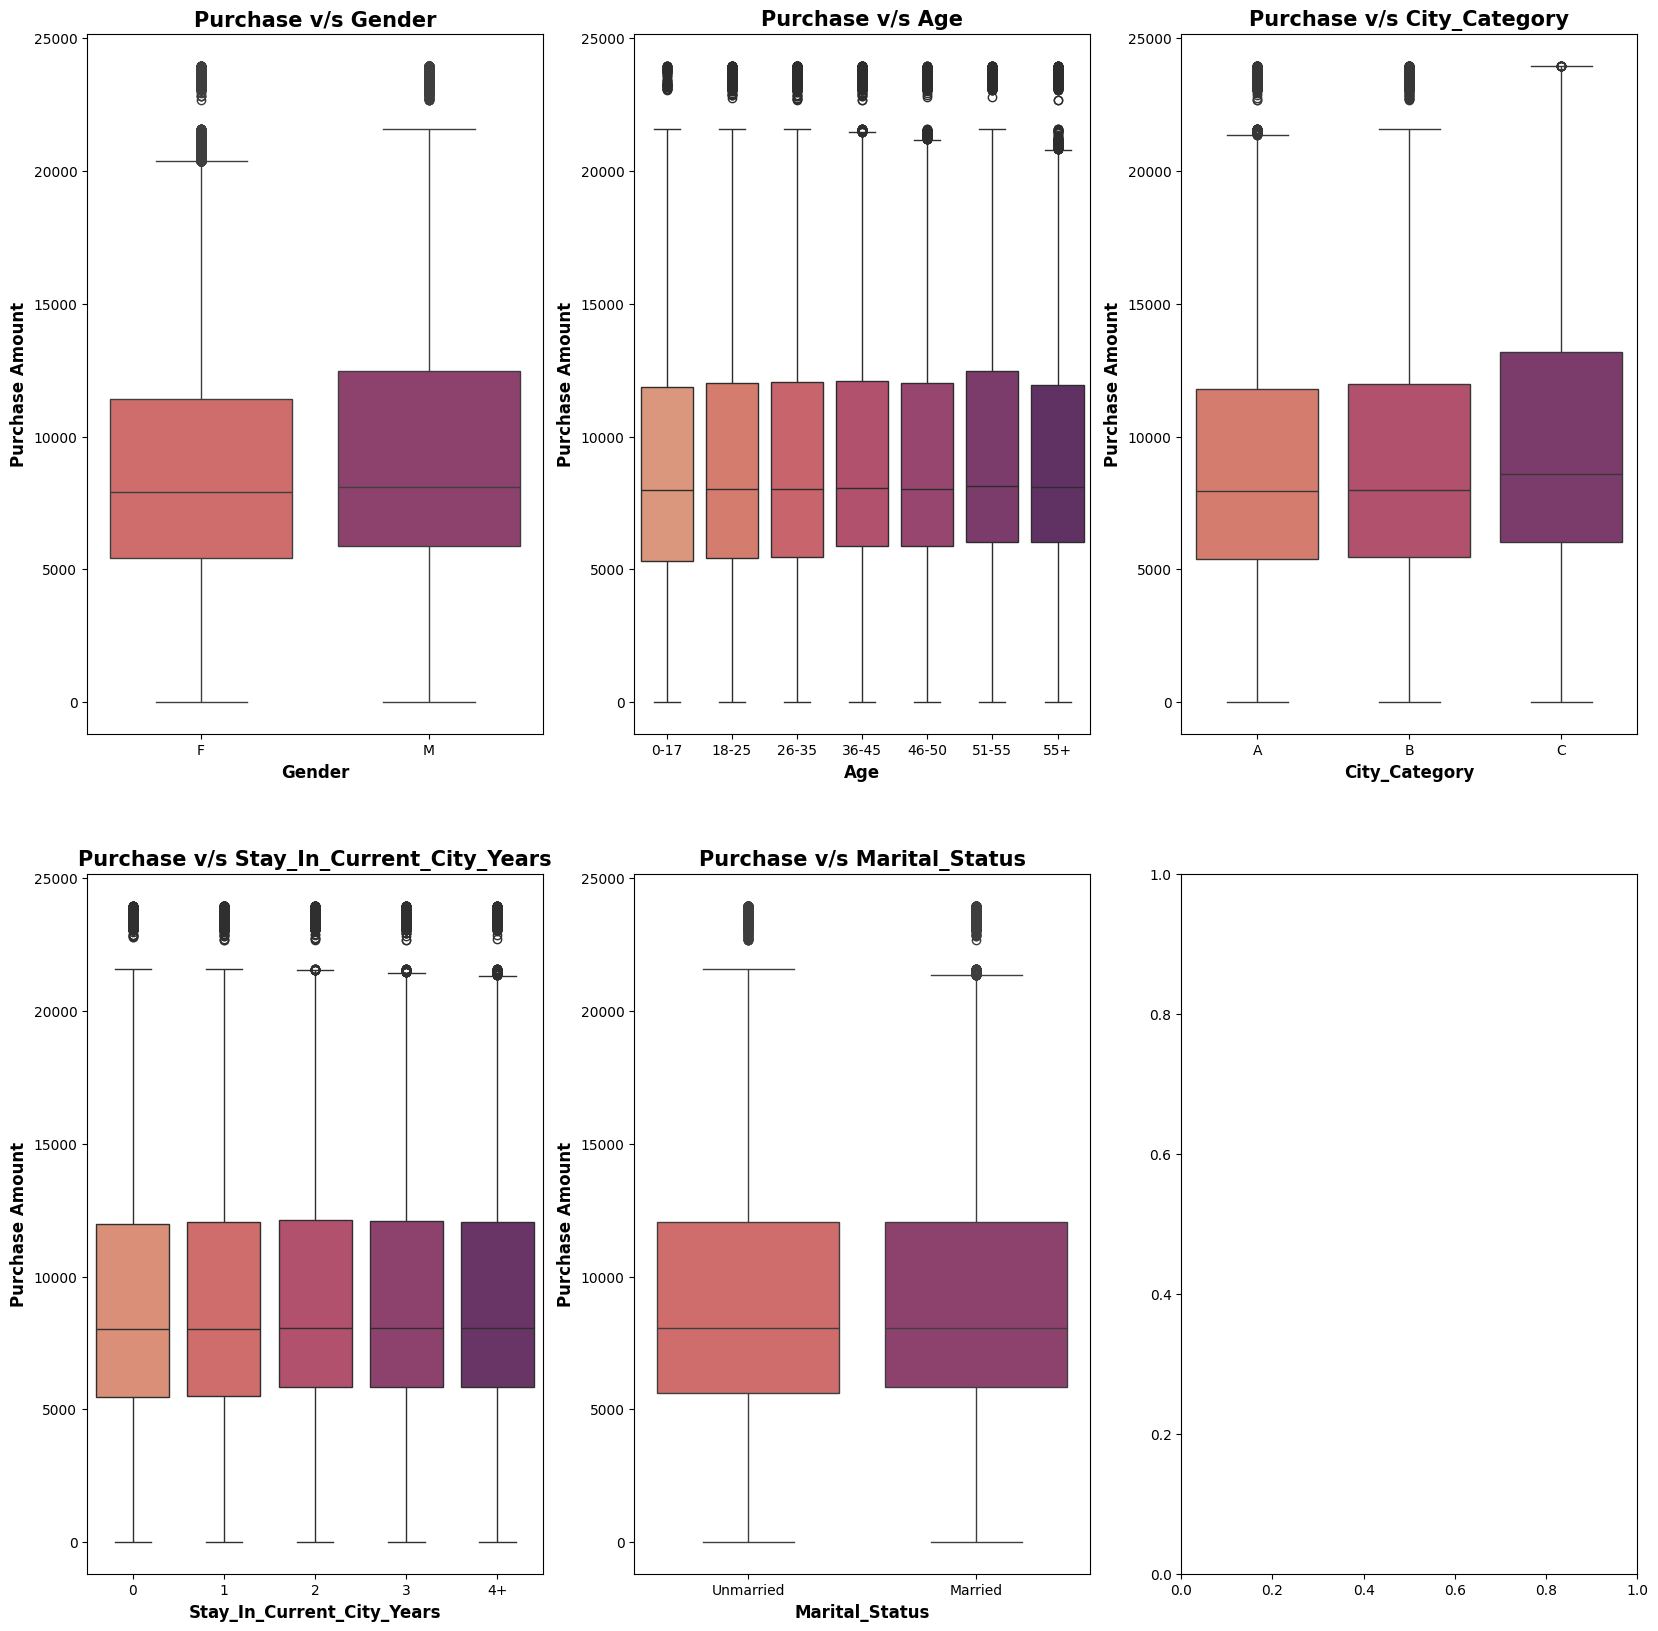

In [23]:
var_cols = ['Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']

fig, axes = plt.subplots(2, 3, figsize = (20, 20))
axes = axes.flatten()

for i, cols, in enumerate(var_cols):
  sns.boxplot(data = walmart_df, x = cols, y = 'Purchase', ax = axes[i], palette = 'flare')
  axes[i].set_title(f"Purchase v/s {cols}", fontweight='bold', fontsize=15)
  axes[i].set_ylabel("Purchase Amount", fontweight='bold', fontsize=12)
  axes[i].set_xlabel(cols, fontweight='bold', fontsize=12)

plt.show()

# **5. Gender V/s Purchase Amount**

### **5.1 Data Visualisation**

In [24]:
# creating a dataframe with sum of Purchase for both Gender
walmart_df_gender_purchase = walmart_df.groupby('Gender')['Purchase'].agg(['sum', 'count']).reset_index()

# adding a new column 'average_spend_per_purchase'
walmart_df_gender_purchase['average_spend_per_purchase'] = round((walmart_df_gender_purchase['sum'] / walmart_df_gender_purchase['count']), 2)

# adding a new column 'total_%'
walmart_df_gender_purchase['total_%'] = round((walmart_df_gender_purchase['sum'] / walmart_df_gender_purchase['sum'].sum())*100, 2)

# renaming M & F as Male & Female
walmart_df_gender_purchase['Gender'] = walmart_df_gender_purchase['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [25]:
walmart_df_gender_purchase

,Gender,sum,count,average_spend_per_purchase,total_%
0,Female,1186232642,135809,8734.57,23.28
1,Male,3909580100,414259,9437.53,76.72


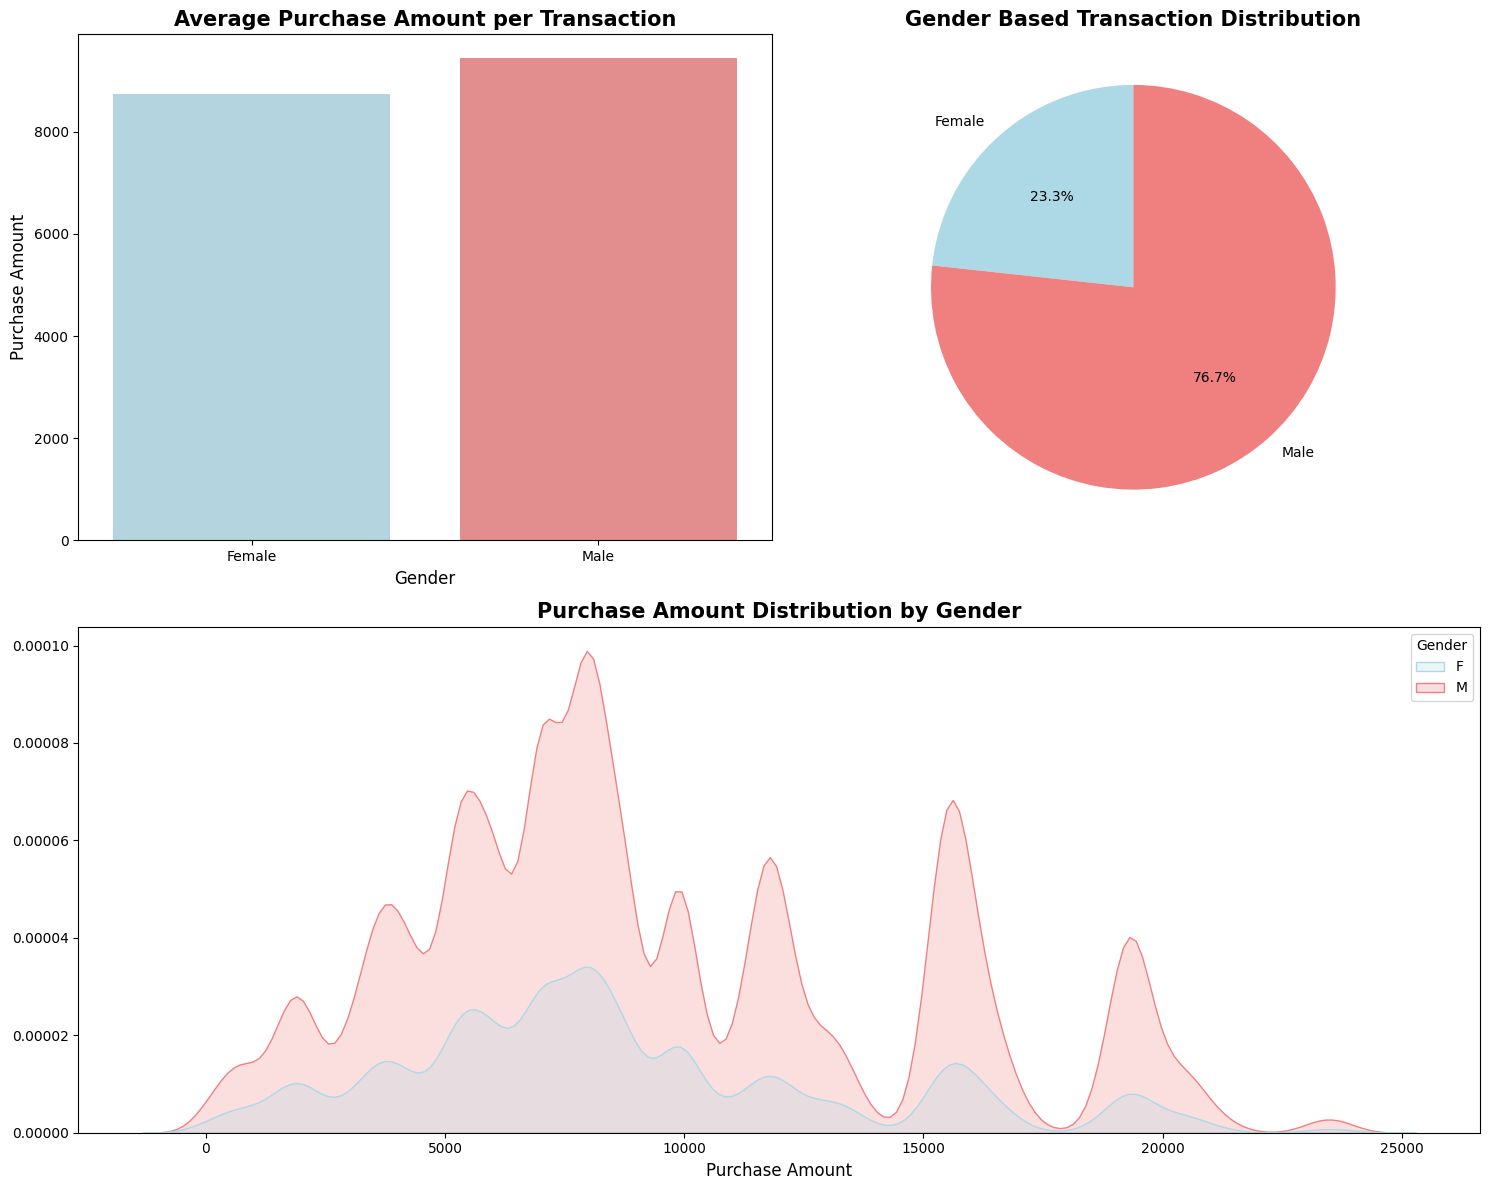

In [26]:
plt.figure(figsize = (15, 12))
ax1 = plt.subplot2grid((2,2), (0,0))
sns.barplot(x = walmart_df_gender_purchase['Gender'], y = walmart_df_gender_purchase['average_spend_per_purchase'], ax = ax1, palette=['lightblue', 'lightcoral'])
ax1.set_title('Average Purchase Amount per Transaction', fontweight='bold', fontsize=15)
ax1.set_xlabel('Gender', fontsize=12)
ax1.set_ylabel('Purchase Amount', fontsize=12)

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.pie(walmart_df_gender_purchase['total_%'], labels = walmart_df_gender_purchase['Gender'], autopct = '%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax2.set_title('Gender Based Transaction Distribution', fontweight='bold', fontsize=15)

ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
sns.kdeplot(data = walmart_df, x = 'Purchase', hue = 'Gender', palette=['lightblue', 'lightcoral'], fill = True, ax = ax3)
ax3.set_title('Purchase Amount Distribution by Gender', fontweight='bold', fontsize=15)
ax3.set_xlabel('Purchase Amount', fontsize=12)
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

***Insights:***

**1. Per Transaction:** The average amount spent per transaction was slightly more by Male customers.

**2. Gender Based Transaction Distribution:** The total amount spent by Male customers was `three` times more than that of Female customers. This tells us that how much Male customers preferred to shop during Black Friday sales.

**3. Purchase Amount Distribution by Gender:** As you can see the chart, the distribution for both the genders does not follow `normal distribution`.


### **5.2 Confidence Level construction: Estimating Average Purchase amount spent per Gender**

In [27]:
# creating function for calculating confidence interval
def confidence_interval(df, ci):

    # calculating alpha
    alpha = 1 - (ci/100)

    # number of samples
    n = len(df)

    # calculating mean, standard deviation and standard error
    means = np.mean(df)
    standard_deviation = np.std(df, ddof=1)
    standard_error = standard_deviation / (np.sqrt(n))

    # calculating Z-critical value
    z_critical = stats.norm.ppf(1 - alpha/2)

    # calculating Margin of Error
    margin_of_error = z_critical * standard_error

    return means - margin_of_error, means + margin_of_error

In [49]:
# creating bootstrap function
def bootstrap_ci (df, n_iterations = 1000, alpha = 0.05):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(df, size = len(df), replace = True)
        means.append(np.mean(sample))

    lower = np.percentile(means, 100 * alpha / 2)
    upper = np.percentile(means, 100 * (1 - alpha / 2))

    return lower, upper

In [50]:
# calculating CI for different Sample Sizes
sample_sizes = [30, 300 ,3000]
results_clt = {}
results_bootstrap = {}

# calculate CI for entire dataset and different different sizes
for i in sample_sizes:
    walmart_df_sample_male = np.random.choice(walmart_df[walmart_df['Gender'] == 'M']['Purchase'], size = i)
    walmart_df_sample_female = np.random.choice(walmart_df[walmart_df['Gender'] == 'F']['Purchase'], size = i)

    # CLT CI
    male_ci_clt = confidence_interval(walmart_df_sample_male, 95)
    female_ci_clt = confidence_interval(walmart_df_sample_female, 95)

    # Bootstrap CI
    male_ci_bootstrap = bootstrap_ci(walmart_df_sample_male)
    female_ci_bootstrap = bootstrap_ci(walmart_df_sample_female)

    results_clt[i] = {'M': male_ci_clt, 'F': female_ci_clt}
    results_bootstrap[i] = {'M': male_ci_bootstrap, 'F': female_ci_bootstrap}

In [51]:
# Printing results
print("Confidence Intervals using CLT: ")
for size in results_clt:
    print(f"Sample Size: {size}, Male CI: {results_clt[size]['M']}, Female CI: {results_clt[size]['F']}")

print("\nConfidence Interval using Bootsteapping: ")
for size in results_bootstrap:
    print(f"Sample Size: {size}, Male CI: {results_bootstrap[size]['M']}, Female CI: {results_bootstrap[size]['F']}")


Confidence Intervals using CLT: 
Sample Size: 30, Male CI: (7722.073281774105, 11820.726718225895), Female CI: (5387.095255108817, 8353.704744891184)
Sample Size: 300, Male CI: (9197.984179037388, 10386.36248762928), Female CI: (8176.13981740398, 9183.786849262688)
Sample Size: 3000, Male CI: (9288.594498901588, 9653.11350109841), Female CI: (8622.322987783313, 8960.24634555002)

Confidence Interval using Bootsteapping: 
Sample Size: 30, Male CI: (7715.765, 11680.710000000001), Female CI: (5366.163333333333, 8325.2725)
Sample Size: 300, Male CI: (9193.5625, 10379.06325), Female CI: (8216.374916666666, 9211.114833333333)
Sample Size: 3000, Male CI: (9303.871500000001, 9644.24145), Female CI: (8612.972000000002, 8958.102916666667)


### **5.3 Visualising through Histogram and KDE plot**

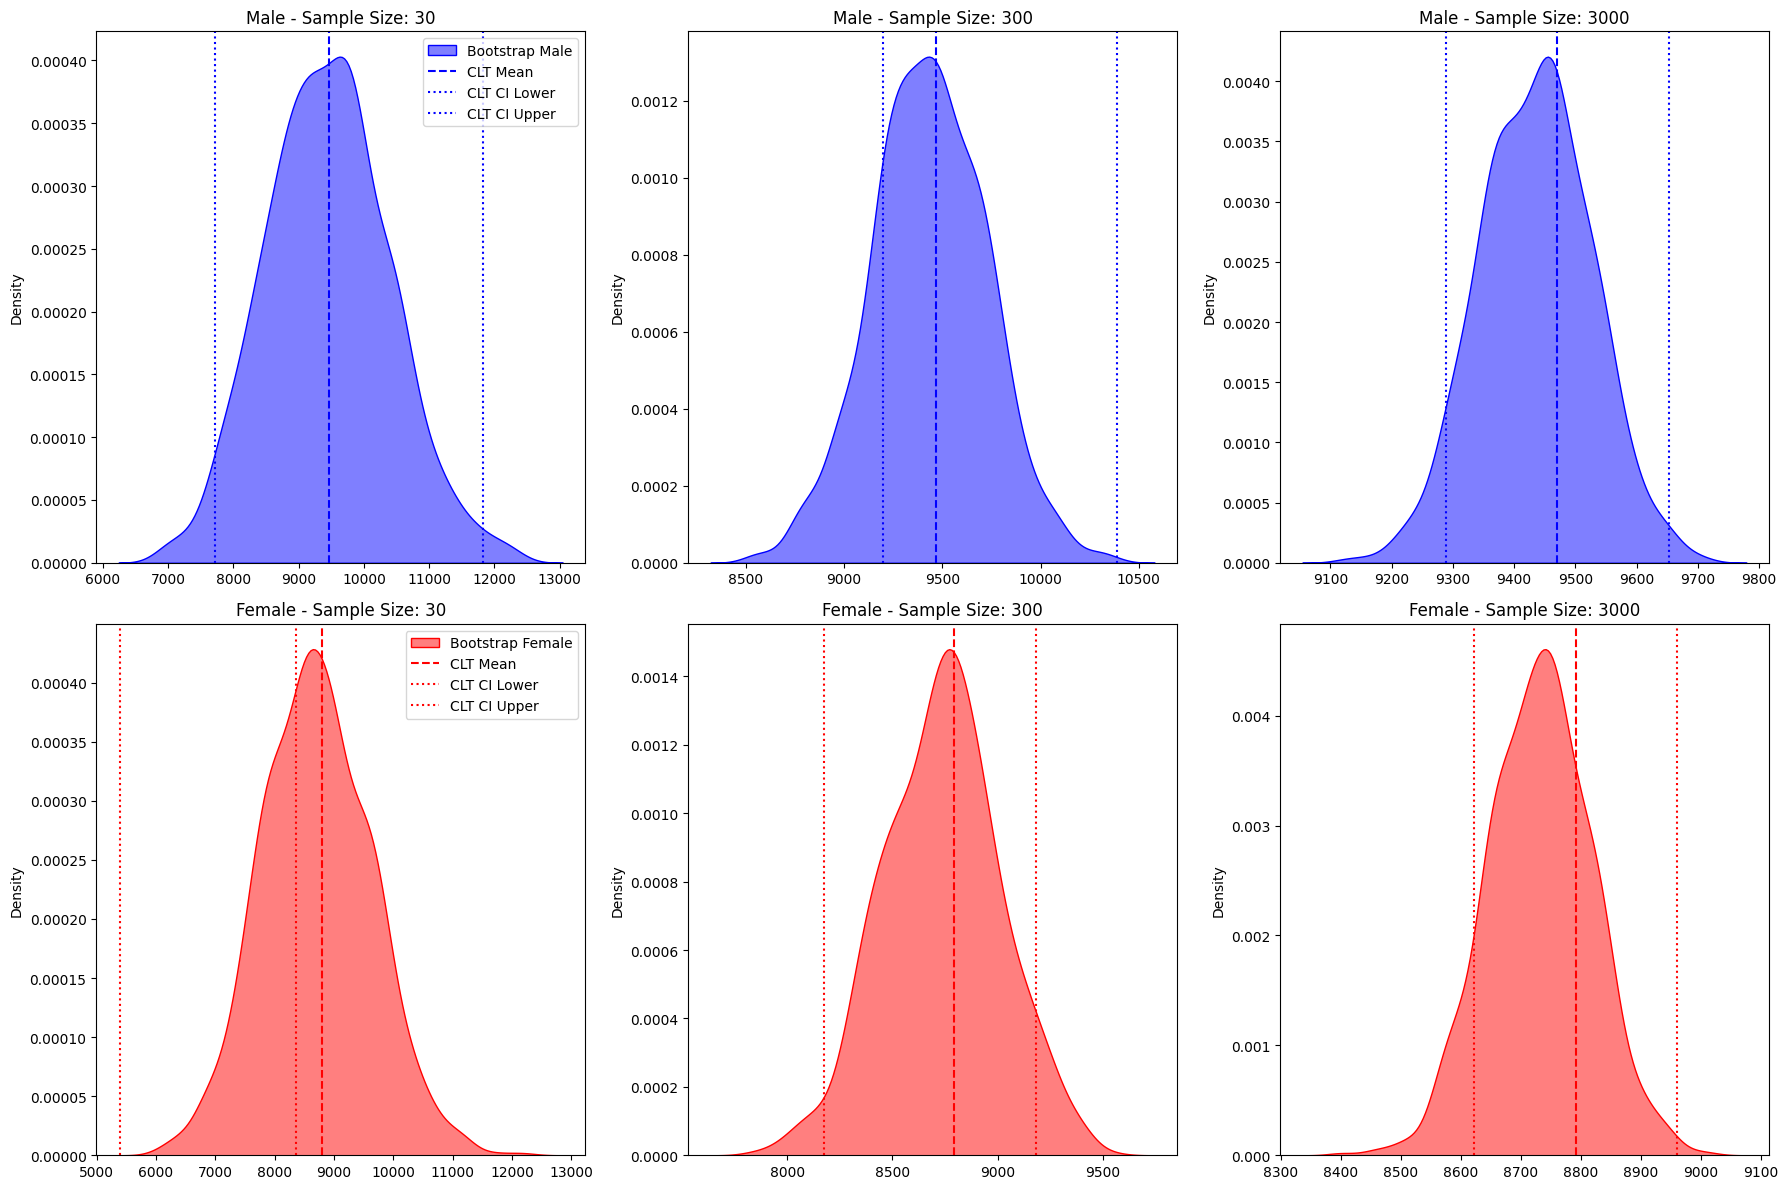

In [52]:
plt.figure(figsize=(18, 12))
for i, size in enumerate(sample_sizes):
    # KDE for Male samples
    male_sample_means = [np.mean(np.random.choice(walmart_df[walmart_df['Gender'] == 'M']['Purchase'], size=size, replace=True)) for _ in range(1000)]

    plt.subplot(2, len(sample_sizes), i + 1)
    sns.kdeplot(male_sample_means, label='Bootstrap Male', fill=True, color='blue', alpha=0.5)

    # Plotting CLT Mean and CI for Male samples
    clt_mean_male = np.mean(walmart_df_sample_male)
    plt.axvline(clt_mean_male, color='blue', linestyle='--', label='CLT Mean')
    plt.axvline(results_clt[size]['M'][0], color='blue', linestyle=':', label='CLT CI Lower')
    plt.axvline(results_clt[size]['M'][1], color='blue', linestyle=':', label='CLT CI Upper')
    plt.title(f"Male - Sample Size: {size}")
    if i == 0:  # Only add legend for first subplot of each gender
        plt.legend(loc='upper right')

    # KDE for Female samples
    female_sample_means = [np.mean(np.random.choice(walmart_df[walmart_df['Gender'] == 'F']['Purchase'], size=size, replace=True)) for _ in range(1000)]

    plt.subplot(2, len(sample_sizes), i + 1 + len(sample_sizes))
    sns.kdeplot(female_sample_means, label='Bootstrap Female', fill=True, color='red', alpha=0.5)

    # Plotting CLT Mean and CI for Female samples
    clt_mean_female = np.mean(walmart_df_sample_female)
    plt.axvline(clt_mean_female, color='red', linestyle='--', label='CLT Mean')
    plt.axvline(results_clt[size]['F'][0], color='red', linestyle=':', label='CLT CI Lower')
    plt.axvline(results_clt[size]['F'][1], color='red', linestyle=':', label='CLT CI Upper')
    plt.title(f"Female - Sample Size: {size}")
    if i == 0:  # Only add legend for first subplot of each gender
        plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

***Insights:***

**1. Sample Size:** The analysis highlights that how important sample size is for calculating CI levels and CLT. `As the sample size increases, the confidence intervals become narrower and more precise.`

**2. Population Average:** We are `95% Confidence` that population average of Male customers lies between `9288.59 dollars and 9653.11 dollars.` Whereas the population average of Female customers lies between `8622.32 and 8960.24 dollars.`

**3. Men Spend more:** This analysis also focuses on how much more money is spent by Male customers as compared to Female customers.

From the above calculated CLT, we can answer the following questions.

**1. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?** `Generally, if one gender has more variability in spending (higher standard deviation), its confidence interval will be wider. You can compare the CIs calculated from the entire dataset to see which is wider.`

**2. How is the width of the confidence interval affected by the sample size?** `As demonstrated in the results, increasing the sample size typically results in narrower confidence intervals due to reduced standard error.`

**3. Do the confidence intervals for different sample sizes overlap?**
`No, the confidence intervals do not overlap`

**4. How does the sample size affect the shape of the distributions of the means?** `With smaller samples, distributions of means are more spread out and less normal (especially if n < 30). As sample size increases, they tend to become more normal due to the Central Limit Theorem.`

# **6. Marital Status V/s Purchase Amount**

### **6.1 Data Visualisation**

In [59]:
# creating a dataframe with sum of Purchase for Marital Status
walmart_df_marital_status_purchase = walmart_df.groupby('Marital_Status')['Purchase'].agg(['sum', 'count']).reset_index()

# adding a new column 'average_spend_per_purchase'
walmart_df_marital_status_purchase['average_spend_per_purchase'] = round((walmart_df_marital_status_purchase['sum'] / walmart_df_marital_status_purchase['count']), 2)

# adding a new column 'total_%'
walmart_df_marital_status_purchase['total_%'] = round((walmart_df_marital_status_purchase['sum'] / walmart_df_marital_status_purchase['sum'].sum())*100, 2)

In [45]:
walmart_df_marital_status_purchase

,Marital_Status,sum,count,average_spend_per_purchase,total_%
0,Unmarried,3008927447,324731,9265.91,59.05
1,Married,2086885295,225337,9261.17,40.95


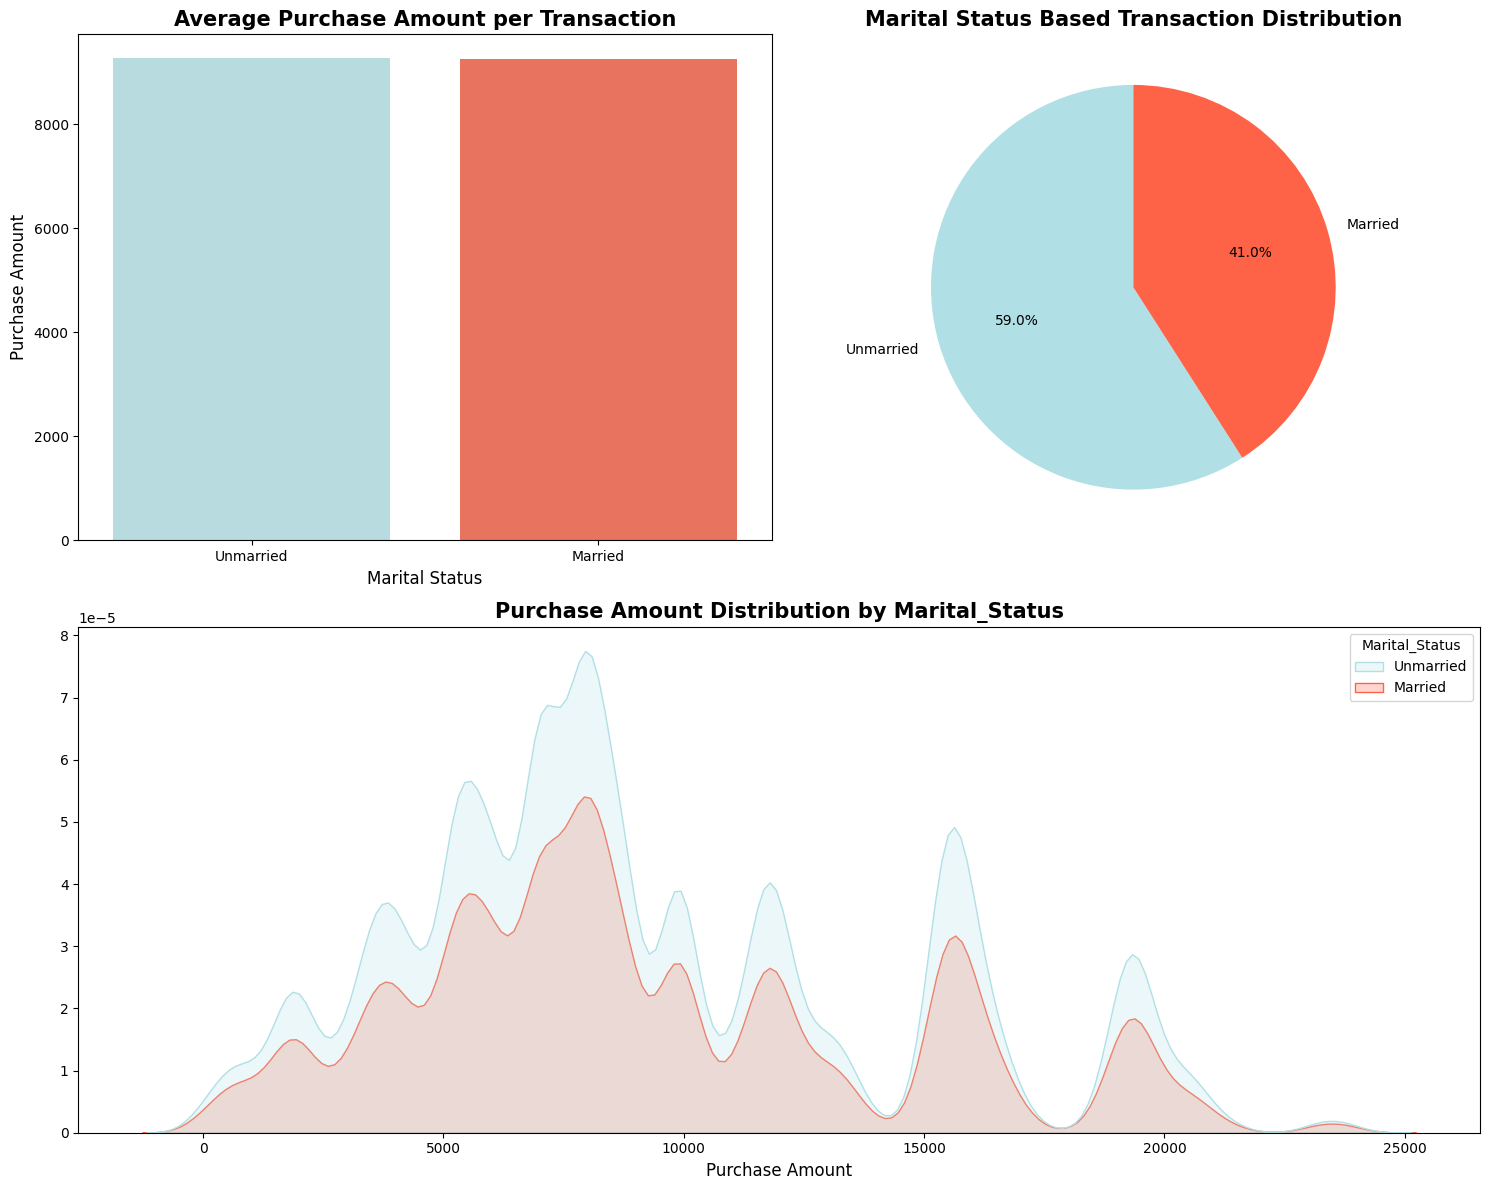

In [54]:
plt.figure(figsize = (15, 12))
ax1 = plt.subplot2grid((2,2), (0,0))
sns.barplot(x = walmart_df_marital_status_purchase['Marital_Status'], y = walmart_df_marital_status_purchase['average_spend_per_purchase'], ax = ax1, palette = ['#B0E0E6', '#FF6347'])
ax1.set_title('Average Purchase Amount per Transaction', fontweight='bold', fontsize=15)
ax1.set_xlabel('Marital Status', fontsize=12)
ax1.set_ylabel('Purchase Amount', fontsize=12)

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.pie(walmart_df_marital_status_purchase['total_%'], labels = walmart_df_marital_status_purchase['Marital_Status'], autopct = '%1.1f%%', startangle=90, colors = ['#B0E0E6', '#FF6347'])
ax2.set_title('Marital Status Based Transaction Distribution', fontweight='bold', fontsize=15)

ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
sns.kdeplot(data = walmart_df, x = 'Purchase', hue = 'Marital_Status', palette = ['#B0E0E6', '#FF6347'], fill = True, ax = ax3)
ax3.set_title('Purchase Amount Distribution by Marital_Status', fontweight='bold', fontsize=15)
ax3.set_xlabel('Purchase Amount', fontsize=12)
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

***Insights:***

**1. Per Transaction:** The average amount spent per transaction was almost similar for both, Married and Unmarried customers.

**2. Marital Status Based Transaction Distribution:** The total amount spent by Unmarried customers was significantly more than that of Married customers. This tells us that how much Unmarried customers preferred to shop during Black Friday sale.

**3. Purchase Amount Distribution by Gender:** As you can see the chart, the distribution for both Marital Status does not follow `normal distribution`.

### **6.2 Confidence Level construction: Estimating Average Purchase amount spent per Marital Status**

In [67]:
# calculating CI for different Sample Sizes
sample_sizes = [30, 300 ,3000]
results_clt = {}
results_bootstrap = {}

# calculate CI for entire dataset and different different sizes
for i in sample_sizes:
    walmart_df_sample_unmarried = np.random.choice(walmart_df[walmart_df['Marital_Status'] == 'Unmarried']['Purchase'], size = i)
    walmart_df_sample_married = np.random.choice(walmart_df[walmart_df['Marital_Status'] == 'Married']['Purchase'], size = i)

    # CLT CI
    unmarried_ci_clt = confidence_interval(walmart_df_sample_unmarried, 95)
    married_ci_clt = confidence_interval(walmart_df_sample_married, 95)

    # Bootstrap CI
    unmarried_ci_bootstrap = bootstrap_ci(walmart_df_sample_unmarried)
    married_ci_bootstrap = bootstrap_ci(walmart_df_sample_married)

    results_clt[i] = {'Unmarried': unmarried_ci_clt, 'Married': married_ci_clt}
    results_bootstrap[i] = {'Unmarried': unmarried_ci_bootstrap, 'Married': married_ci_bootstrap}

In [57]:
# Printing results
print("Confidence Intervals using CLT: ")
for size in results_clt:
    print(f"Sample Size: {size}, Unmarried CI: {results_clt[size]['Unmarried']}, Married CI: {results_clt[size]['Married']}")

print("\nConfidence Interval using Bootsteapping: ")
for size in results_bootstrap:
    print(f"Sample Size: {size}, Unmarried CI: {results_bootstrap[size]['Unmarried']}, Married CI: {results_bootstrap[size]['Married']}")

Confidence Intervals using CLT: 
Sample Size: 30, Unmarried CI: (7394.765074808485, 11034.434925191516), Married CI: (7836.399579254919, 11229.667087411746)
Sample Size: 300, Unmarried CI: (8715.653786074727, 9879.926213925275), Married CI: (8505.860971427881, 9620.51902857212)
Sample Size: 3000, Unmarried CI: (9234.235323818342, 9599.45800951499), Married CI: (9006.827656531106, 9362.339676802228)

Confidence Interval using Bootsteapping: 
Sample Size: 30, Unmarried CI: (7427.3983333333335, 10929.201666666666), Married CI: (7959.090833333333, 11142.5525)
Sample Size: 300, Unmarried CI: (8731.004416666667, 9929.309916666667), Married CI: (8557.475333333332, 9620.9865)
Sample Size: 3000, Unmarried CI: (9242.68905, 9606.560608333333), Married CI: (9011.69485, 9355.418741666666)


### **6.3 Visualising through Histogram and KDE plot**

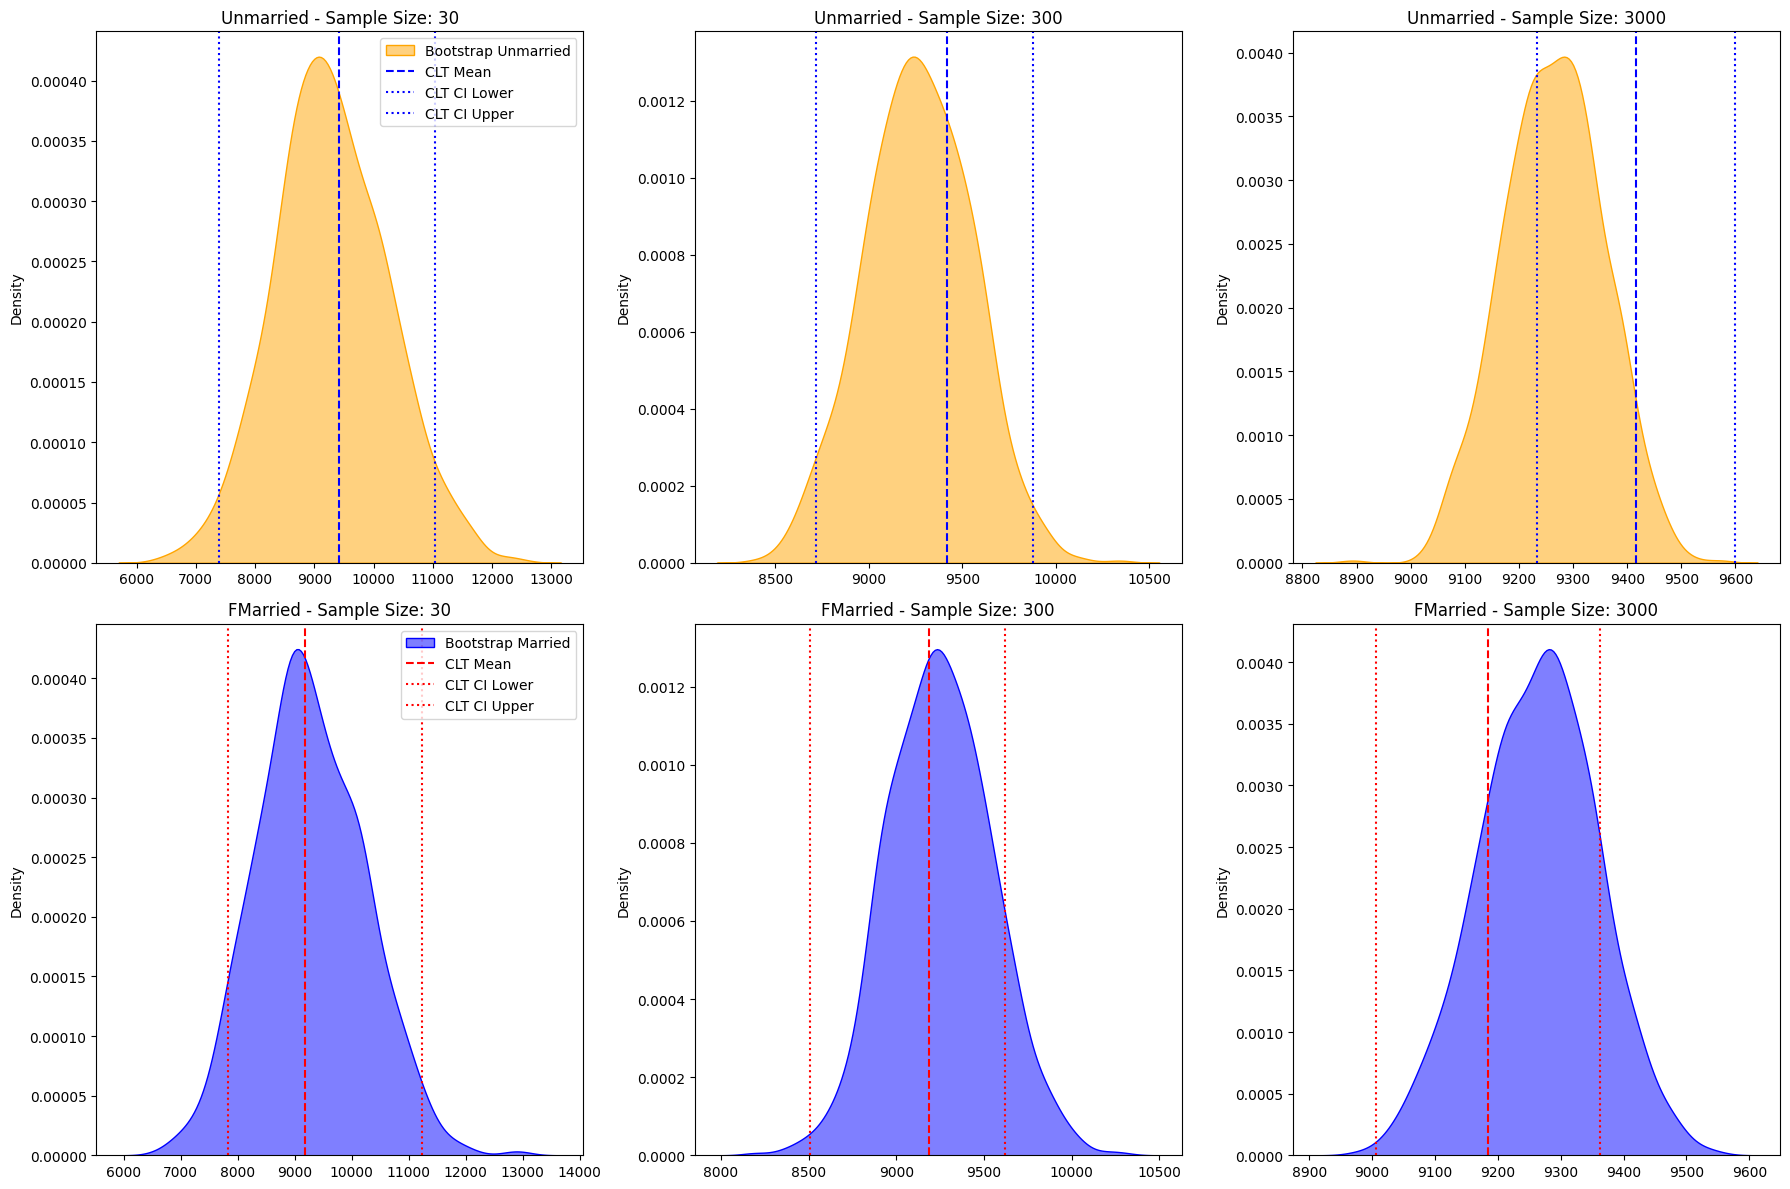

In [58]:
plt.figure(figsize=(18, 12))
for i, size in enumerate(sample_sizes):
    # KDE for Unmarried samples
    unmarried_sample_means = [np.mean(np.random.choice(walmart_df[walmart_df['Marital_Status'] == 'Unmarried']['Purchase'], size=size, replace=True)) for _ in range(1000)]

    plt.subplot(2, len(sample_sizes), i + 1)
    sns.kdeplot(unmarried_sample_means, label='Bootstrap Unmarried', fill=True, color='orange', alpha=0.5)

    # Plotting CLT Mean and CI for Unmarried samples
    clt_mean_unmarried = np.mean(walmart_df_sample_unmarried)
    plt.axvline(clt_mean_unmarried, color='blue', linestyle='--', label='CLT Mean')
    plt.axvline(results_clt[size]['Unmarried'][0], color='blue', linestyle=':', label='CLT CI Lower')
    plt.axvline(results_clt[size]['Unmarried'][1], color='blue', linestyle=':', label='CLT CI Upper')
    plt.title(f"Unmarried - Sample Size: {size}")
    if i == 0:  # Only add legend for first subplot of each status
        plt.legend(loc='upper right')

    # KDE for Married samples
    married_sample_means = [np.mean(np.random.choice(walmart_df[walmart_df['Marital_Status'] == 'Married']['Purchase'], size = size, replace = True)) for _ in range(1000)]

    plt.subplot(2, len(sample_sizes), i + 1 + len(sample_sizes))
    sns.kdeplot(married_sample_means, label='Bootstrap Married', fill=True, color='blue', alpha=0.5)

    # Plotting CLT Mean and CI for Married samples
    clt_mean_married = np.mean(walmart_df_sample_married)
    plt.axvline(clt_mean_married, color='red', linestyle='--', label='CLT Mean')
    plt.axvline(results_clt[size]['Married'][0], color='red', linestyle=':', label='CLT CI Lower')
    plt.axvline(results_clt[size]['Married'][1], color='red', linestyle=':', label='CLT CI Upper')
    plt.title(f"Married - Sample Size: {size}")
    if i == 0:  # Only add legend for first subplot of each status
        plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

***Insights:***

**1. Sample Size:** The analysis highlights that how important sample size is for calculating CI levels and CLT. `As the sample size increases, the confidence intervals become narrower and more precise.`

**2. Population Average:** We are `95% Confidence` that population average of Unmarried customers lies between `9234.23 dollars and 9599.45 dollars.` Whereas the population average of Married customers lies between `9006.82 dollars and 9362.33 dollars.`

**3. Almost Equal Spend:** This analysis also tells us that money spent by Unmarried customers is almost same as compared to Married customers.

From the above calculated CLT, we can answer the following questions.

**1. Is the confidence interval computed using the entire dataset wider for one of the Marital Status? Why is this the case?** `Generally, if one status has more variability in spending (higher standard deviation), its confidence interval will be wider. You can compare the CIs calculated from the entire dataset to see which is wider.`

**2. How is the width of the confidence interval affected by the sample size?** `As demonstrated in the results, increasing the sample size typically results in narrower confidence intervals due to reduced standard error.`

**3. Do the confidence intervals for different sample sizes overlap?**
`Yes, the confidence intervals do overlap`

**4. How does the sample size affect the shape of the distributions of the means?** `With smaller samples, distributions of means are more spread out and less normal (especially if n < 30). As sample size increases, they tend to become more normal due to the Central Limit Theorem.`

# **7. Customer Age V/s Purchase Amount**

### **7.1 Data Visualisation**

In [60]:
# creating a dataframe with sum of Purchase for Customer Age
walmart_df_age_purchase = walmart_df.groupby('Age')['Purchase'].agg(['sum', 'count']).reset_index()

# adding a new column 'average_spend_per_purchase'
walmart_df_age_purchase['average_spend_per_purchase'] = round((walmart_df_age_purchase['sum'] / walmart_df_age_purchase['count']), 2)

# adding a new column 'total_%'
walmart_df_age_purchase['total_%'] = round((walmart_df_age_purchase['sum'] / walmart_df_age_purchase['sum'].sum())*100, 2)

In [61]:
walmart_df_age_purchase

,Age,sum,count,average_spend_per_purchase,total_%
0,0-17,134913183,15102,8933.46,2.65
1,18-25,913848675,99660,9169.66,17.93
2,26-35,2031770578,219587,9252.69,39.87
3,36-45,1026569884,110013,9331.35,20.15
4,46-50,420843403,45701,9208.63,8.26
5,51-55,367099644,38501,9534.81,7.20
6,55+,200767375,21504,9336.28,3.94


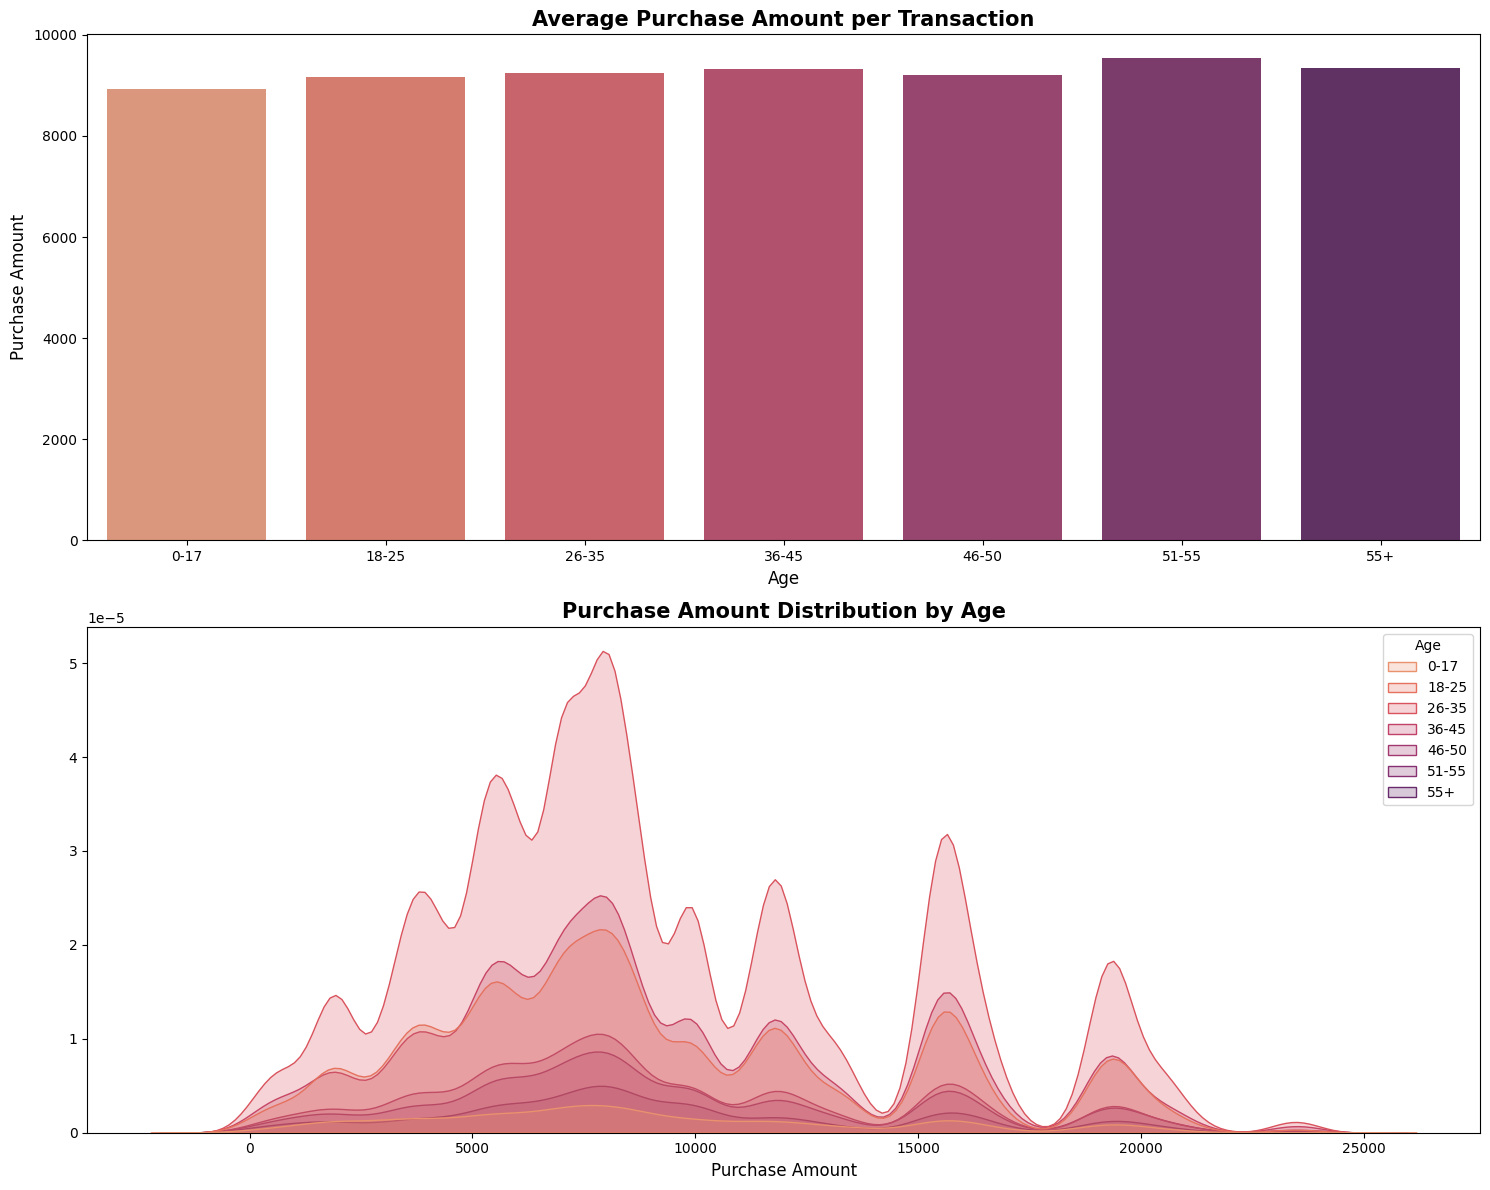

In [66]:
plt.figure(figsize = (15, 12))
ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)
sns.barplot(x = walmart_df_age_purchase['Age'], y = walmart_df_age_purchase['average_spend_per_purchase'], ax = ax1, palette = 'flare')
ax1.set_title('Average Purchase Amount per Transaction', fontweight='bold', fontsize=15)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Purchase Amount', fontsize=12)

ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
sns.kdeplot(data = walmart_df, x = 'Purchase', hue = 'Age', palette = 'flare', fill = True, ax = ax3)
ax3.set_title('Purchase Amount Distribution by Age', fontweight='bold', fontsize=15)
ax3.set_xlabel('Purchase Amount', fontsize=12)
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

***Insights:***

**1. Per Transaction:** The average amount spent per transaction was most from customers ages between `26-45 years`.

**2. Marital Status Based Transaction Distribution:** The total amount spent by customers ages between `51-55 years` was significantly more than any other age group.

**3. Purchase Amount Distribution by Gender:** As you can see the chart, the distribution for both Marital Status does not follow `normal distribution`.

### **7.2 Confidence Level construction: Estimating Average Purchase amount spent per Marital Status**

In [68]:
# calculating CI for different Sample Sizes
sample_sizes = [30, 300 ,3000]
results_clt = {}
results_bootstrap = {}

# calculate CI for entire dataset and different different sizes
for i in sample_sizes:
    walmart_df_sample_age1 = np.random.choice(walmart_df[walmart_df['Age'] == '0-17']['Purchase'], size = i)
    walmart_df_sample_age2 = np.random.choice(walmart_df[walmart_df['Age'] == '18-25']['Purchase'], size = i)
    walmart_df_sample_age3 = np.random.choice(walmart_df[walmart_df['Age'] == '26-35']['Purchase'], size = i)
    walmart_df_sample_age4 = np.random.choice(walmart_df[walmart_df['Age'] == '36-45']['Purchase'], size = i)
    walmart_df_sample_age5 = np.random.choice(walmart_df[walmart_df['Age'] == '46-50']['Purchase'], size = i)
    walmart_df_sample_age6 = np.random.choice(walmart_df[walmart_df['Age'] == '51-55']['Purchase'], size = i)
    walmart_df_sample_age7 = np.random.choice(walmart_df[walmart_df['Age'] == '55+']['Purchase'], size = i)

    # CLT CI
    age1_ci_clt = confidence_interval(walmart_df_sample_age1, 95)
    age2_ci_clt = confidence_interval(walmart_df_sample_age2, 95)
    age3_ci_clt = confidence_interval(walmart_df_sample_age3, 95)
    age4_ci_clt = confidence_interval(walmart_df_sample_age4, 95)
    age5_ci_clt = confidence_interval(walmart_df_sample_age5, 95)
    age6_ci_clt = confidence_interval(walmart_df_sample_age6, 95)
    age7_ci_clt = confidence_interval(walmart_df_sample_age7, 95)

    # Bootstrap CI
    age1_ci_bootstrap = bootstrap_ci(walmart_df_sample_age1)
    age2_ci_bootstrap = bootstrap_ci(walmart_df_sample_age2)
    age3_ci_bootstrap = bootstrap_ci(walmart_df_sample_age3)
    age4_ci_bootstrap = bootstrap_ci(walmart_df_sample_age4)
    age5_ci_bootstrap = bootstrap_ci(walmart_df_sample_age5)
    age6_ci_bootstrap = bootstrap_ci(walmart_df_sample_age6)
    age7_ci_bootstrap = bootstrap_ci(walmart_df_sample_age7)

    results_clt[i] = {'0-17': age1_ci_clt, '18-25': age2_ci_clt, '26-35': age3_ci_clt, '36-45': age4_ci_clt, '46-50': age5_ci_clt,
                      '51-55': age6_ci_clt, '55+': age7_ci_clt}
    results_bootstrap[i] = {'0-17': age1_ci_bootstrap, '18-25': age2_ci_bootstrap, '26-35': age3_ci_bootstrap, '36-45': age4_ci_bootstrap, '46-50': age5_ci_bootstrap,
                      '51-55': age6_ci_bootstrap, '55+': age7_ci_bootstrap}

In [69]:
# Printing results
print("Confidence Intervals using CLT: ")
for size in results_clt:
    print(f"Sample Size: {size}, 0-17: {results_clt[size]['0-17']}, 18-25: {results_clt[size]['18-25']}, 26-35: {results_clt[size]['26-35']}, 36-45: {results_clt[size]['36-45']}, 46-50: {results_clt[size]['46-50']}, 51-55: {results_clt[size]['51-55']}, 55+: {results_clt[size]['55+']}")

print("\nConfidence Interval using Bootsteapping: ")
for size in results_bootstrap:
    print(f"Sample Size: {size}, 0-17: {results_bootstrap[size]['0-17']}, 18-25: {results_bootstrap[size]['18-25']}, 26-35: {results_bootstrap[size]['26-35']}, 36-45: {results_bootstrap[size]['36-45']}, 46-50: {results_bootstrap[size]['46-50']}, 51-55: {results_bootstrap[size]['51-55']}, 55+: {results_bootstrap[size]['55+']}")

Confidence Intervals using CLT: 
Sample Size: 30, 0-17: (6831.523299529003, 10636.410033804332), 18-25: (8190.352819655627, 11342.247180344371), 26-35: (7269.838707441161, 10636.961292558837), 36-45: (8155.0688966342595, 11992.531103365738), 46-50: (7108.263168616623, 10115.27016471671), 51-55: (7614.431009160884, 11259.035657505783), 55+: (5940.595040030728, 8981.204959969271)
Sample Size: 300, 0-17: (9062.662073824766, 10232.477926175234), 18-25: (8965.906459654103, 10088.186873679231), 26-35: (9105.938320510842, 10286.441679489159), 36-45: (8909.27076597007, 10008.762567363263), 46-50: (8030.544213468674, 9108.415786531325), 51-55: (8785.72497380583, 9910.288359527502), 55+: (8647.666807858031, 9770.473192141968)
Sample Size: 3000, 0-17: (9020.611342933817, 9393.395323732851), 18-25: (8972.566561431673, 9329.494771901662), 26-35: (8933.232923227144, 9281.687743439521), 36-45: (9159.015488100424, 9521.966511899576), 46-50: (9053.167119398411, 9402.77221393492), 51-55: (9357.760329289

### **7.3 Visualising through Histogram and KDE plot**

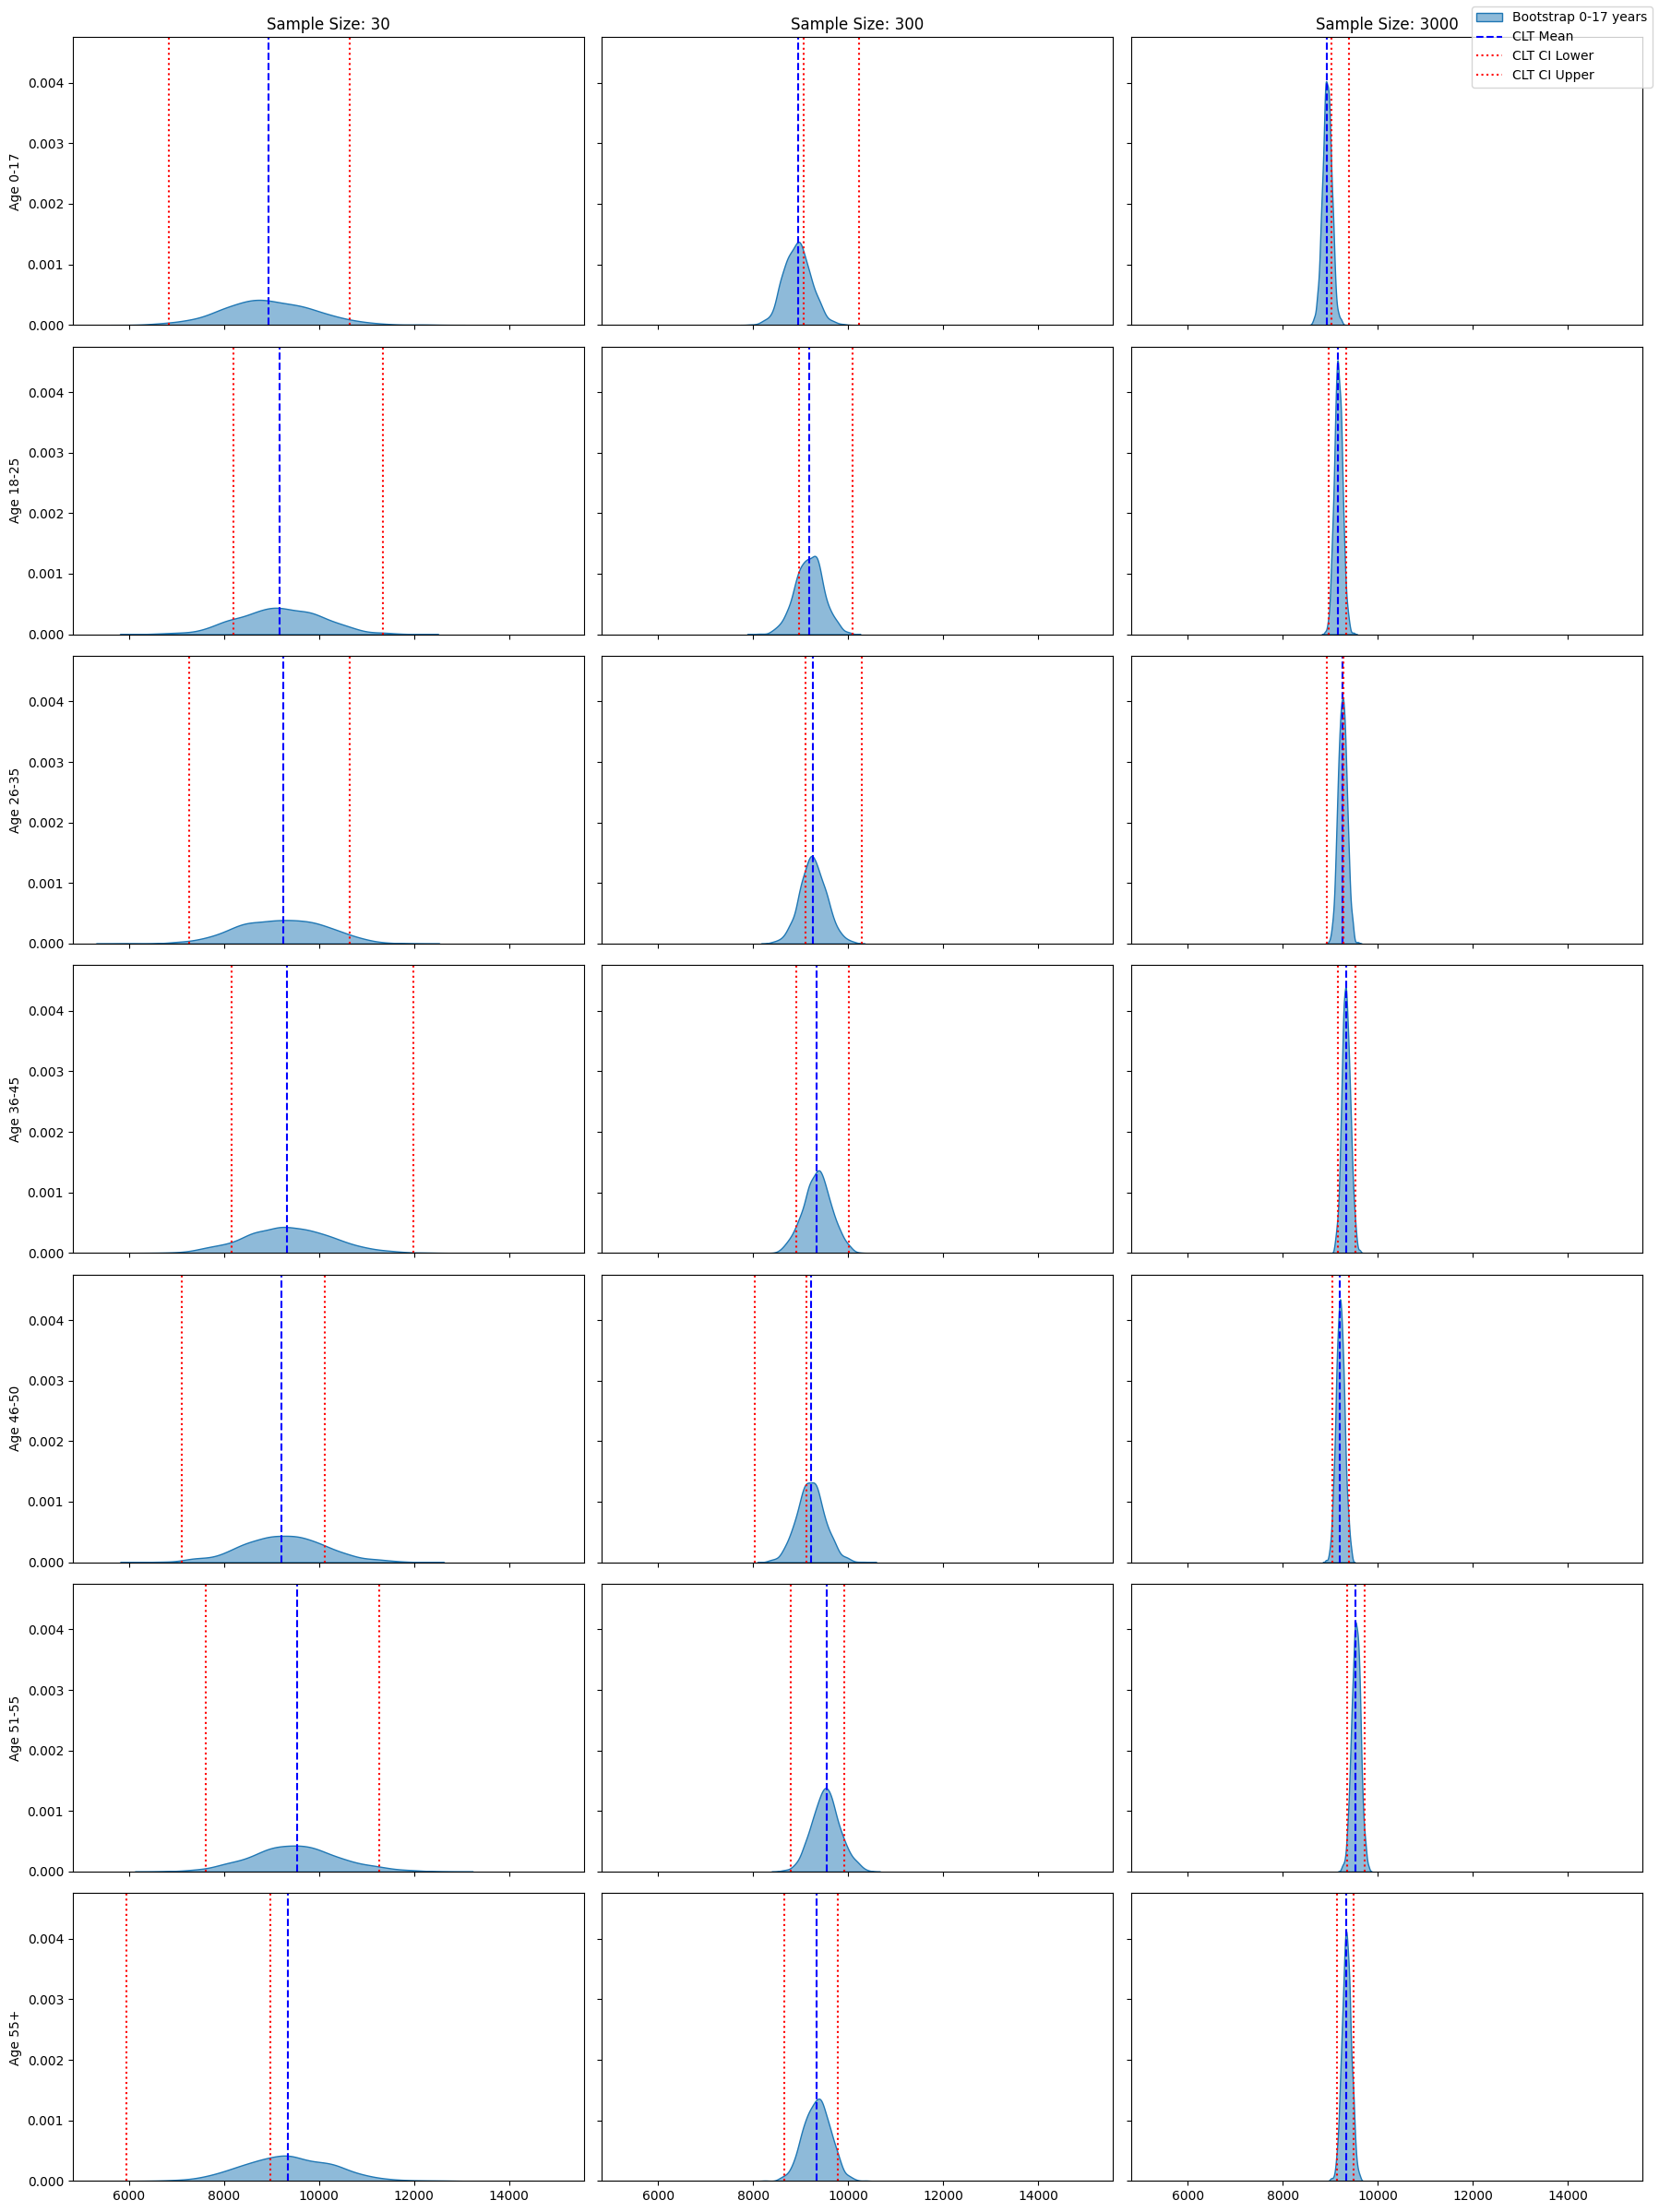

In [73]:
# Define the figure and create a grid for subplots
fig, axes = plt.subplots(7, len(sample_sizes), figsize=(18, 24), sharex=True, sharey=True)

for i, size in enumerate(sample_sizes):
    for j, age_group in enumerate(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']):

        # Calculate bootstrapped sample means for each age group
        sample_means = [
            np.mean(np.random.choice(walmart_df[walmart_df['Age'] == age_group]['Purchase'], size=size, replace=True))
            for _ in range(1000)
        ]

        # Plot KDE for sample means
        sns.kdeplot(sample_means, ax=axes[j, i], fill=True, alpha=0.5, label=f'Bootstrap {age_group} years')

        # Plot CLT Mean and CI lines
        clt_mean = np.mean(walmart_df[walmart_df['Age'] == age_group]['Purchase'])
        ci_lower, ci_upper = results_clt[size][age_group]

        axes[j, i].axvline(clt_mean, color='blue', linestyle='--', label='CLT Mean')
        axes[j, i].axvline(ci_lower, color='red', linestyle=':', label='CLT CI Lower')
        axes[j, i].axvline(ci_upper, color='red', linestyle=':', label='CLT CI Upper')

        # Titles and labels
        if j == 0:
            axes[j, i].set_title(f"Sample Size: {size}")
        if i == 0:
            axes[j, i].set_ylabel(f"Age {age_group}")

# Use only one legend for the whole figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

***Insights:***

**1. Sample Size:** The analysis highlights that how important sample size is for calculating CI levels and CLT. `As the sample size increases, the confidence intervals become narrower and more precise.`

**2. Population Average:** We are `95% Confidence` that population average of for following age groups lies between:

- *0-17 years:* `9020.61 dollars and 9393.39 dollars.`
- *18-25 years:* `8972.56 dollars, 9329.49 dollars.`
- *26-35 years:* `8933.23 dollars and 9281.68 dollars.`
- *36-45 years:* `9159.01 dollars and 9521.96 dollars.`
- *46-50 years:* `9053.71 dollars and 9402.77 dollars.`
- *51-55 years:* `9357.76 dollars and 9721.97 dollars.`
- *55+ years:* `9143.95 dollars and 9500.84 dollars.`

**3. Almost Equal Spend:** This analysis also tells us that money spent by customers aged between 51-55 years is more as compared to customers belonging to other age groups.

# **8. Final Insights Documented**


### **8.1 Does the confidence intervals for the average amount spent by males and females overlap? How can Walmart leverage this conclusion to make changes or improvements?**

- *Segment Oppotunities:* `Walmart can create various marketing campaigns targeting the spending behaviours of Male and Female customers. This may help in maximise revenue from each customer segment.`

- *Pricing Strategies:* `Based on the above data of average spending per transaction by gender, they might adjust or provide more discounts to male customers to incentivize higher spending among male customers, while ensuring being competitive pricing for female customers.`

### **8.2 Does the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?**

- *Marketing Resources:* `Walmart should not introduce marketing strategies focusing on just one group. Instead, they should introduce strategies which brings out the most money to spend from both these groups.`

### **8.3 Does the confidence intervals for the average amount spent by different age groups (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?**

- *Targeted Marketing:* `Walmart should try and come up with more marketing strategies to focus on spending of customers falling in age group of 0-17 years.`
- *Premium Services:* `Since the customers in the 51-55 years age group have the highest spending per transaction, Walmart can provide them premium services and high end products, premium after sales services, personalised recommendations etc. so that they encourage this spending behaviour of these customers.`

# **9. Recommendations**

### **9.1 Target Male Customers**

- Walmart should keep encouraging the buying behaviour of the Male customers by introducing new marketing strategies focusing on them. These strategies can include high end products for sale, more discounts, good deals and membership services.

### **9.2 Focus on 26-45 Age group**

- As reported earlier that customers in the age group of 26-45 years have the majority of purchases made during Black Friday sale, Walmart should specifically cater to the preferences and needs of this demographic.

### **9.3 Engage Younger Shoppers**

- We noticed that the sales among customers belonging to 0-25 years did not contribute majorly to the total money spent. To encourage spending habits in this age group, a further analysis should be conducted to come up with new marketing strategies.

### **9.4 Post Black Friday Sale Engagement**

- After Black Friday, Walmart should engage in after sale services and feedbacks about the sale and what could be improved for next year's sale.

### **9.5 Enhance the 51-55 Age group Shopping Experience**

- Since the customers in the 51-55 years age group have the highest spending per transaction, Walmart can offer the exlusive pre-sale access, premium services and high end products, premium after sales services, personalised recommendations etc. so that they encourage this spending behaviour of these customers.